## Predicting Students Academic Performance from Daily Routine

Author: **Shahzaib Haider** \
Project: **Mock Project**

## 1- Problem Statement:
Student academic success is influenced by multiple lifestyle and routine factors such as study hours, sleep patterns, class attendance, stress levels, and extracurricular involvement. Identifying the relationship between these daily routine variables and academic outcomes can help educators, parents, and students themselves to take corrective actions early.

In this project, we aim to predict whether a student will Pass or Fail based on their daily routine and lifestyle habits using machine learning models.

## Data Collection:
Data Set is prepared by Artificial Intelligence as it's a mock project.


In [16]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [17]:
df = pd.read_csv("student_routine_dataset.csv")

df.head()

,Student_ID,Sleep_Hours,Study_Hours,Class_Attendance,Extracurricular_Activities,Screen_Time,Social_Activity,Physical_Exercise,Part_Time_Work,Diet_Quality,Stress_Level,Result
0,S001,7,8,41,1,1,1,7,20,1,6,Pass
1,S002,8,6,88,10,8,3,0,14,2,1,Pass
2,S003,6,1,67,4,8,0,4,15,1,4,Pass
3,S004,8,3,71,6,6,3,5,4,4,1,Pass
4,S005,8,1,66,7,4,1,6,19,3,6,Pass


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  300 non-null    object
 1   Sleep_Hours                 300 non-null    int64 
 2   Study_Hours                 300 non-null    int64 
 3   Class_Attendance            300 non-null    int64 
 4   Extracurricular_Activities  300 non-null    int64 
 5   Screen_Time                 300 non-null    int64 
 6   Social_Activity             300 non-null    int64 
 7   Physical_Exercise           300 non-null    int64 
 8   Part_Time_Work              300 non-null    int64 
 9   Diet_Quality                300 non-null    int64 
 10  Stress_Level                300 non-null    int64 
 11  Result                      300 non-null    object
dtypes: int64(10), object(2)
memory usage: 28.3+ KB


## 3- Data Cleaning

### Handling Missing Values

1. Handling Missing Values
2. Handling Duplicates
3. Check Data Types
4. Understand the Dataset

In [19]:
## Checking missing values

df.isnull().sum()

Student_ID                    0
Sleep_Hours                   0
Study_Hours                   0
Class_Attendance              0
Extracurricular_Activities    0
Screen_Time                   0
Social_Activity               0
Physical_Exercise             0
Part_Time_Work                0
Diet_Quality                  0
Stress_Level                  0
Result                        0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  300 non-null    object
 1   Sleep_Hours                 300 non-null    int64 
 2   Study_Hours                 300 non-null    int64 
 3   Class_Attendance            300 non-null    int64 
 4   Extracurricular_Activities  300 non-null    int64 
 5   Screen_Time                 300 non-null    int64 
 6   Social_Activity             300 non-null    int64 
 7   Physical_Exercise           300 non-null    int64 
 8   Part_Time_Work              300 non-null    int64 
 9   Diet_Quality                300 non-null    int64 
 10  Stress_Level                300 non-null    int64 
 11  Result                      300 non-null    object
dtypes: int64(10), object(2)
memory usage: 28.3+ KB


In [21]:
## Checking all the categorical features to understand whether the 
## Data contains any mistakes or not
print(df['Result'].value_counts())

## perform the same operation on other categories as well

Result
Pass    236
Fail     64
Name: count, dtype: int64


## Missing Steps

No need to impute null values as features contains no nan values. If it contains, then the nan values in categorical features will be replaced by mode while in numeric features these will be replaced by median.

In [22]:
df.head()

,Student_ID,Sleep_Hours,Study_Hours,Class_Attendance,Extracurricular_Activities,Screen_Time,Social_Activity,Physical_Exercise,Part_Time_Work,Diet_Quality,Stress_Level,Result
0,S001,7,8,41,1,1,1,7,20,1,6,Pass
1,S002,8,6,88,10,8,3,0,14,2,1,Pass
2,S003,6,1,67,4,8,0,4,15,1,4,Pass
3,S004,8,3,71,6,6,3,5,4,4,1,Pass
4,S005,8,1,66,7,4,1,6,19,3,6,Pass


In [23]:
## Drop unnecessary columns which have nothing to do with student's academic performance and can minimize model's efficiency.

df.drop('Student_ID', inplace=True, axis=1)
df.drop('Diet_Quality' , inplace=True, axis=1)

df.head()

,Sleep_Hours,Study_Hours,Class_Attendance,Extracurricular_Activities,Screen_Time,Social_Activity,Physical_Exercise,Part_Time_Work,Stress_Level,Result
0,7,8,41,1,1,1,7,20,6,Pass
1,8,6,88,10,8,3,0,14,1,Pass
2,6,1,67,4,8,0,4,15,4,Pass
3,8,3,71,6,6,3,5,4,1,Pass
4,8,1,66,7,4,1,6,19,6,Pass


In [24]:
## Getting all the Numeric features

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

## getting all the Categorical features

cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('Number of numeric features', len(num_features))
print('Number of Categorical Features', len(cat_features))

Number of numeric features 9
Number of Categorical Features 1


In [25]:
## Discrete Features 

discrete_features = [feature for feature in num_features if len(df[feature].unique())<=25]

## Continuous Features
continuous_features = [feature for feature in num_features if len(df[feature].unique())>25]

print('Number of Discrete features', len(discrete_features))
print('Number of Continuous features', len(continuous_features))

Number of Discrete features 8
Number of Continuous features 1


In [26]:
df.head()

,Sleep_Hours,Study_Hours,Class_Attendance,Extracurricular_Activities,Screen_Time,Social_Activity,Physical_Exercise,Part_Time_Work,Stress_Level,Result
0,7,8,41,1,1,1,7,20,6,Pass
1,8,6,88,10,8,3,0,14,1,Pass
2,6,1,67,4,8,0,4,15,4,Pass
3,8,3,71,6,6,3,5,4,1,Pass
4,8,1,66,7,4,1,6,19,6,Pass


## 4- Train Test Split and Model Training

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(['Result'], axis=1)
y = df['Result']

X.head()

,Sleep_Hours,Study_Hours,Class_Attendance,Extracurricular_Activities,Screen_Time,Social_Activity,Physical_Exercise,Part_Time_Work,Stress_Level
0,7,8,41,1,1,1,7,20,6
1,8,6,88,10,8,3,0,14,1
2,6,1,67,4,8,0,4,15,4
3,8,3,71,6,6,3,5,4,1
4,8,1,66,7,4,1,6,19,6


In [29]:
y.value_counts()

Result
Pass    236
Fail     64
Name: count, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((240, 9), (60, 9))

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Sleep_Hours                 300 non-null    int64
 1   Study_Hours                 300 non-null    int64
 2   Class_Attendance            300 non-null    int64
 3   Extracurricular_Activities  300 non-null    int64
 4   Screen_Time                 300 non-null    int64
 5   Social_Activity             300 non-null    int64
 6   Physical_Exercise           300 non-null    int64
 7   Part_Time_Work              300 non-null    int64
 8   Stress_Level                300 non-null    int64
dtypes: int64(9)
memory usage: 21.2 KB


In [35]:
## Creating Column Transformer

cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [36]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [37]:
## Applying transformation in training dataset ----> fit_transform

X_train = preprocessor.fit_transform(X_train)

print(X_train)

[[-0.25839521 -1.50185328 -0.73920701 ...  1.61870658  0.11212161
   0.17502025]
 [ 0.32665054  0.23313968  1.44677481 ... -1.55078882 -0.86639422
  -0.89289994]
 [-0.25839521 -1.06810504 -0.45157782 ...  1.16592152  1.25372341
  -0.89289994]
 ...
 [-0.25839521  0.66688792 -1.0268362  ... -0.64521871 -0.70330825
   1.59891385]
 [-0.25839521  0.23313968 -0.22147447 ... -1.09800376 -0.05096437
  -1.60484674]
 [-1.42848671  0.66688792 -1.14188787 ...  1.16592152 -0.86639422
  -0.53692654]]


In [38]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8
0,-0.258395,-1.501853,-0.739207,0.668361,-0.721114,-0.836332,1.618707,0.112122,0.175020
1,0.326651,0.233140,1.446775,-1.511923,1.058499,0.330643,-1.550789,-0.866394,-0.892900
2,-0.258395,-1.068105,-0.451578,0.045423,0.168692,-1.419820,1.165922,1.253723,-0.892900
3,0.326651,0.233140,0.411310,0.979830,1.058499,-0.836332,-0.192434,-1.681824,0.175020
4,1.496742,0.666888,-1.429517,-0.888985,0.613596,-0.252845,-0.645219,-0.866394,-0.536927
...,...,...,...,...,...,...,...,...,...
235,-0.258395,0.666888,-0.336526,0.979830,1.058499,0.914131,0.260351,-1.192566,1.598914
236,1.496742,0.233140,0.986568,0.356892,1.058499,-1.419820,0.713136,0.438294,-0.180953
237,-0.258395,0.666888,-1.026836,1.602768,0.168692,1.497618,-0.645219,-0.703308,1.598914
238,-0.258395,0.233140,-0.221474,-1.200454,1.503402,1.497618,-1.098004,-0.050964,-1.604847


In [39]:
## Apply transformation in test data using ----> transform

X_test = preprocessor.transform(X_test)

In [40]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8
0,1.496742,0.666888,-1.774672,-0.266046,-1.610920,0.914131,-0.192434,1.416809,-0.892900
1,-1.428487,1.534384,-1.371991,1.602768,-1.610920,0.914131,-0.645219,-0.214050,1.598914
2,-0.258395,1.100636,0.813991,0.668361,0.168692,0.330643,-0.645219,-0.703308,-0.892900
3,0.911696,-1.068105,0.181206,-1.511923,-1.610920,-0.252845,1.618707,-1.681824,0.175020
4,-0.258395,1.534384,-0.681681,0.045423,0.613596,-0.252845,-1.550789,-1.681824,-0.180953
5,-0.843441,1.100636,-0.624155,0.356892,0.168692,-0.252845,-0.192434,-0.377136,-0.180953
6,-0.843441,1.534384,1.504301,-1.200454,-1.610920,-1.419820,-0.645219,-1.029480,1.598914
7,-0.258395,1.534384,-0.739207,0.356892,-0.276211,-1.419820,1.618707,0.112122,-1.604847
8,-0.843441,0.233140,-0.681681,-1.511923,1.503402,0.914131,-1.550789,-0.866394,-0.536927
9,-0.843441,0.666888,0.756465,0.979830,0.168692,-1.419820,1.165922,-0.214050,1.242940


## 5- Random Forest Classifier Training

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, \
precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Encode y_train and y_test
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train_enc)  # Train on encoded labels

    ## Making Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Training set performance 
    model_train_accuracy = accuracy_score(y_train_enc, y_train_pred)
    model_train_f1 = f1_score(y_train_enc, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train_enc, y_train_pred)
    model_train_recall = recall_score(y_train_enc, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train_enc, y_train_pred)

    ## Test Performance
    model_test_accuracy = accuracy_score(y_test_enc, y_test_pred)
    model_test_f1 = f1_score(y_test_enc, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test_enc, y_test_pred)
    model_test_recall = recall_score(y_test_enc, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test_enc, y_test_pred)

    ## Print Results
    print(name)
    print('Model Performance for Training Set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

    print('='*35)

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')


Logistic Regression
Model Performance for Training Set
- Accuracy: 0.9458
- F1 score: 0.9453
- Precision: 0.9572
- Recall: 0.9728
- ROC AUC Score: 0.9150
Model Performance for Test set
- Accuracy: 0.9333
- F1 score: 0.9387
- Precision: 1.0000
- Recall: 0.9231
- ROC AUC Score: 0.9615


Decision Tree
Model Performance for Training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
Model Performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000


Random Forest
Model Performance for Training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
Model Performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000




In [44]:
## Hyperparameter tuning

rf_params = {
    "max_depth": [5,8,15,None,10],
    "max_features": [5,7,"auto",8],
    "min_samples_split": [2,8,15,20],
    "n_estimators": [100,200,500,1000]
}

In [45]:
## Models list for hyperparameter tuning
randomcv_models = [
    ("RF", LogisticRegression(), rf_params)
]  ## Tuple

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define parameter grids for each model
param_grid = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ['liblinear', 'lbfgs']
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "max_features": ['sqrt', 'log2']
    }
}

# Create model list with names and param grids
randomcv_models = [
    ("Logistic Regression", LogisticRegression(), param_grid["Logistic Regression"]),
    ("Decision Tree", DecisionTreeClassifier(), param_grid["Decision Tree"]),
    ("Random Forest", RandomForestClassifier(), param_grid["Random Forest"])
]

model_param = {}

# Run RandomizedSearchCV for each model
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=20,      # reduce from 100 if dataset is small
        cv=3,
        verbose=2,
        n_jobs=-1,
        random_state=42
    )
    
    random.fit(X_train, y_train_enc)   # use encoded labels
    model_param[name] = random.best_params_

# Print results
for model_name in model_param:
    print(f'---------------- Best Params for {model_name} ----------------')
    print(model_param[model_name])


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
---------------- Best Params for Logistic Regression ----------------
{'solver': 'lbfgs', 'C': 1}
---------------- Best Params for Decision Tree ----------------
{'min_samples_split': 2, 'max_depth': 30, 'criterion': 'entropy'}
---------------- Best Params for Random Forest ----------------
{'n_estimators': 50, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 30}


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Define tuned Logistic Regression model
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', C=1, max_iter=1000)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train_enc)  # use encoded labels

    ## Making Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Training set performance 
    model_train_accuracy = accuracy_score(y_train_enc, y_train_pred)
    model_train_f1 = f1_score(y_train_enc, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train_enc, y_train_pred)
    model_train_recall = recall_score(y_train_enc, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train_enc, y_train_pred)

    ## Test Performance
    model_test_accuracy = accuracy_score(y_test_enc, y_test_pred)
    model_test_f1 = f1_score(y_test_enc, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test_enc, y_test_pred)
    model_test_recall = recall_score(y_test_enc, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test_enc, y_test_pred)

    print(list(models.keys())[i])

    print('Model Performance for Training Set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

    print('-'*35)

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')


Logistic Regression
Model Performance for Training Set
- Accuracy: 0.9458
- F1 score: 0.9453
- Precision: 0.9572
- Recall: 0.9728
- ROC AUC Score: 0.9150
-----------------------------------
Model Performance for Test set
- Accuracy: 0.9333
- F1 score: 0.9387
- Precision: 1.0000
- Recall: 0.9231
- ROC AUC Score: 0.9615




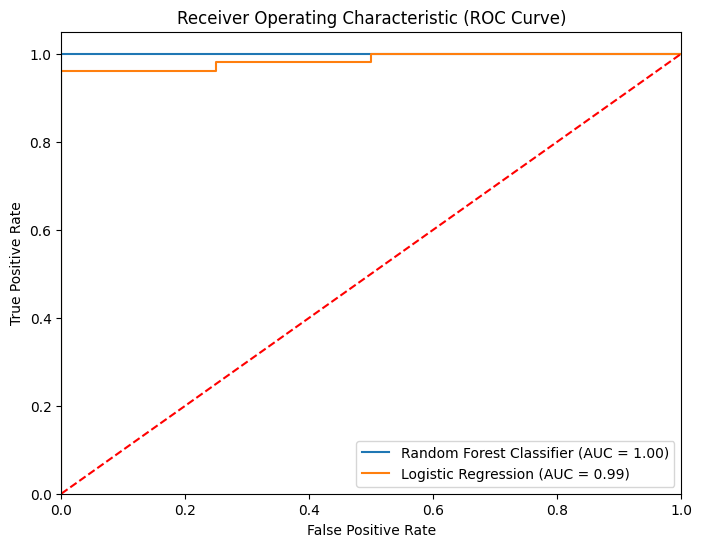

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Example: Add the models you want to compare
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(
            n_estimators=1000, 
            min_samples_split=2,
            max_features=8, 
            max_depth=None,
            random_state=42
        )
    },
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(solver='lbfgs', C=1, max_iter=1000)
    }
]

# Loop through models
plt.figure(figsize=(8, 6))

for algo in auc_models:
    model = algo['model']  
    model.fit(X_train, y_train_enc)  # train with encoded labels

    # Probabilities for ROC
    y_scores = model.predict_proba(X_test)[:, 1]

    # FPR, TPR, thresholds
    fpr, tpr, thresholds = roc_curve(y_test_enc, y_scores)

    # AUC score
    auc = roc_auc_score(y_test_enc, y_scores)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc:.2f})")

# Random guess line
plt.plot([0, 1], [0, 1], 'r--')

# Plot formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()
